In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/Users/machome/Desktop/DS-3001/data/AQI Data.csv')

In [6]:
data.head()

,Month,Year,Date,AVG AQI,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1.0,2014.0,1/1/14,30.38,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2014.0,2/1/14,48.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2014.0,3/1/14,55.49,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2014.0,4/1/14,35.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2014.0,5/1/14,39.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
series = data["AVG AQI"]

In [17]:
model = ARIMA(series, order=(10,1,5))  # Example order, you can adjust as needed
model_fit = model.fit()

/Users/machome/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/machome/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/machome/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                AVG AQI   No. Observations:                  951
Model:                ARIMA(10, 1, 5)   Log Likelihood                -357.900
Date:                Sun, 24 Mar 2024   AIC                            747.800
Time:                        21:43:06   BIC                            825.504
Sample:                             0   HQIC                           777.406
                                - 951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3636      0.306      1.188      0.235      -0.236       0.964
ar.L2         -1.2490      0.274     -4.560      0.000      -1.786      -0.712
ar.L3          0.1828      0.533      0.343      0.7

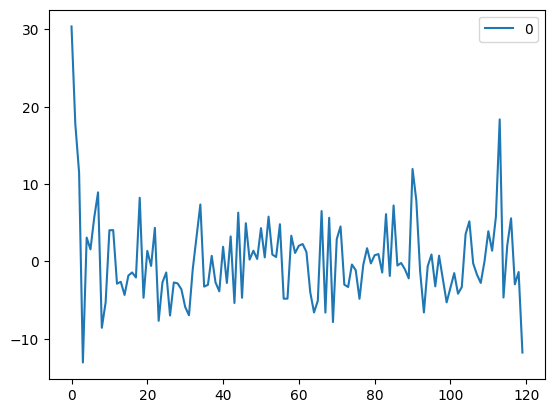

In [19]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [20]:
# Forecast
forecast = model_fit.forecast(steps=10)  # Adjust number of steps as needed
print(forecast)

951    37.662520
952    37.671264
953    37.664670
954    37.649677
955    37.641722
956    37.648849
957    37.663578
958    37.670750
959    37.663130
960    37.648699
Name: predicted_mean, dtype: float64
